In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('aggregate maybe.csv')
# df2 = pd.read_csv('aggregate direct.csv')

# df = pd.concat([df.iloc[:16], df2.iloc[:16]], ignore_index=True)

In [40]:
df
df = df[df["Label"] != "TOTAL"]

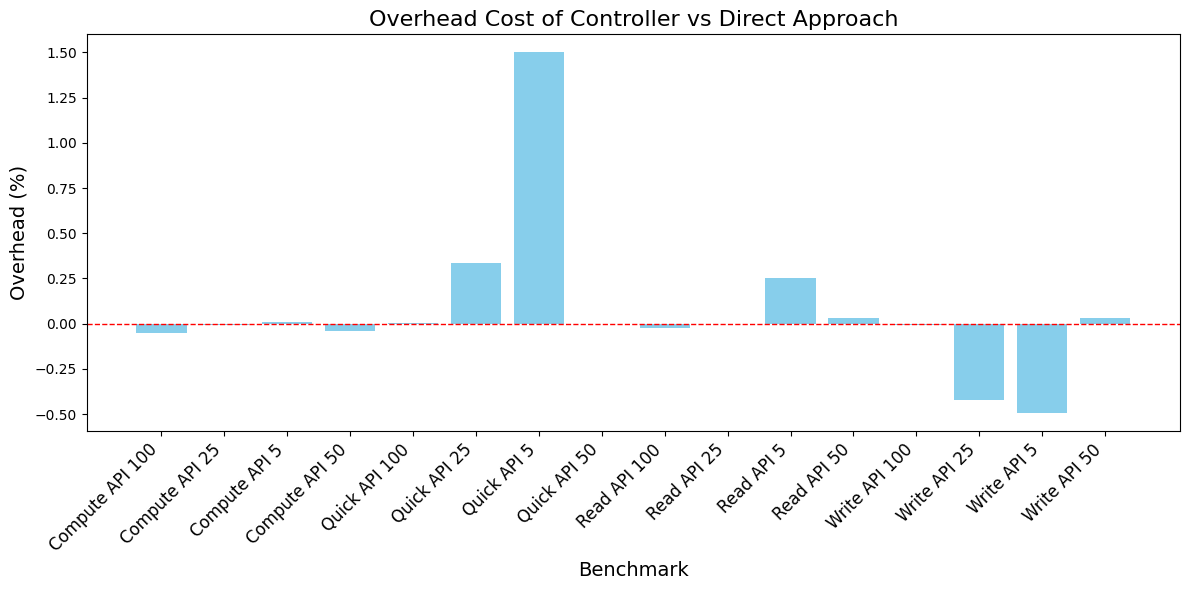

In [41]:
# Separate controller and direct benchmarks
df["Type"] = df["Label"].apply(lambda x: "Direct" if "Direct" in x else "Controller")
df["Benchmark"] = df["Label"].apply(lambda x: x.replace(" Direct", ""))

# Pivot to calculate overhead
df_pivot = df.pivot(index="Benchmark", columns="Type", values="Average").reset_index()
df_pivot["Overhead"] = ((df_pivot["Controller"]- df_pivot["Direct"]) / df_pivot["Direct"])

# Visualization
plt.figure(figsize=(12, 6))
plt.bar(df_pivot["Benchmark"], df_pivot["Overhead"], color="skyblue")
plt.axhline(0, color="red", linewidth=1, linestyle="--")
plt.title("Overhead Cost of Controller vs Direct Approach", fontsize=16)
plt.ylabel("Overhead (%)", fontsize=14)
plt.xlabel("Benchmark", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()

In [42]:
# Calculate mean overhead
mean_overhead = df_pivot["Overhead"].mean()
print(f"Mean Overhead Latency: {mean_overhead:.2f}%")

Mean Overhead Latency: 0.07%


In [43]:
# Calculate mean overhead per benchmark
df_pivot["Mean Overhead"] = df_pivot.groupby("Benchmark")["Overhead"].transform("mean")

# Print mean overhead per benchmark
print("Mean Overhead Latency per Benchmark:")
print(df_pivot[["Benchmark", "Mean Overhead"]])

Mean Overhead Latency per Benchmark:
Type        Benchmark  Mean Overhead
0     Compute API 100      -0.053179
1      Compute API 25      -0.004808
2       Compute API 5       0.012165
3      Compute API 50      -0.038475
4       Quick API 100       0.004279
5        Quick API 25       0.333333
6         Quick API 5       1.500000
7        Quick API 50       0.000407
8        Read API 100      -0.023618
9         Read API 25       0.000000
10         Read API 5       0.250000
11        Read API 50       0.029422
12      Write API 100      -0.006150
13       Write API 25      -0.419940
14        Write API 5      -0.493921
15       Write API 50       0.030955


In [46]:
df_pivot['Mean Overhead'] = df_pivot[["Benchmark", "Mean Overhead"]]['Mean Overhead']*([100,25,5,50]*4)

In [47]:


# Calculate the average of "Mean Overhead" per each 4 rows
df_pivot["Group"] = (df_pivot.index // 4) + 1
average_per_group = df_pivot.groupby("Group")[["Mean Overhead"]].mean().reset_index()

# Print the result
print("Average Mean Overhead per each 4 rows:")
print(average_per_group)

Average Mean Overhead per each 4 rows:
Type  Group  Mean Overhead
0         1      -1.825245
1         2       4.070408
2         3       0.089824
3         4      -3.008829
